In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
rent_data = "Resources/City_MedianRentalPrice_AllHomes-TT.csv"
sales_data = "Resources/Sale_Prices_Msa-TT.csv"

# Read the City and Ride Data
rent_data_df= pd.read_csv(rent_data)
sales_data_df= pd.read_csv(sales_data)



In [3]:
#filter only by the chosen location
regions = ['New York', 'Los Angeles','Chicago','Dallas',
           'Philadelphia', 'Miami','Atlanta', 'Cleveland',
           'Seattle', 'Phoenix']


#filter out period from 01-2010 to 09-2016 due to blanks
rent_data_df_cleaned=rent_data_df.drop(['2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12'
                  ,'2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12'
                  ,'2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12'
                  ,'2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12'
                  ,'2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12'
                  ,'2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'
                  ,'2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09'], axis=1)



In [4]:
#pull in region name
population_df = rent_data_df_cleaned.loc[rent_data_df_cleaned['RegionName'].isin(regions)]
population_df['RegionName'].unique()

array(['Los Angeles', 'Atlanta', 'Chicago', 'New York', 'Cleveland',
       'Philadelphia', 'Phoenix', 'Dallas', 'Seattle', 'Miami'],
      dtype=object)

In [5]:
#remove dup cities 
popcleanrent_df=population_df.drop_duplicates(['RegionName'], keep='first')
popcleanrent_df

,RegionName,State,Metro,CountyName,SizeRank,2016-10,2016-11,2016-12,2017-01,2017-02,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
0,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2,3197.0,3500.0,3250.0,3300.0,3400.0,...,3500.0,3575.0,3500.0,3600.0,3600.0,3600.0,3600.0,3575.0,3500.0,3500.0
1,Atlanta,GA,Atlanta-Sandy Springs-Roswell,Fulton County,40,1495.0,1435.0,1495.0,1450.0,1500.0,...,1723.5,1800.0,1800.0,1800.0,1750.0,1700.0,1750.0,1750.0,1795.0,1750.0
2,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,1714.5,1700.0,1695.0,1700.0,1700.0,...,1800.0,1850.0,1840.0,1850.0,1800.0,1795.0,1750.0,1750.0,1745.0,1715.0
3,New York,NY,New York-Newark-Jersey City,Queens County,1,2950.0,2900.0,2885.0,2900.0,2995.0,...,2900.0,2900.0,2900.0,2900.0,2900.0,2850.0,2805.0,2800.0,2800.0,2800.0
4,Cleveland,OH,Cleveland-Elyria,Cuyahoga County,50,825.0,845.0,850.0,800.0,850.0,...,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,850.0,895.0
5,Philadelphia,PA,Philadelphia-Camden-Wilmington,Philadelphia County,6,1300.0,1395.0,1300.0,1350.0,1385.0,...,1550.0,1500.0,1500.0,1475.0,1400.0,1400.0,1450.0,1400.0,1400.0,1450.0
6,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,7,1200.0,1200.0,1195.0,1222.5,1250.0,...,1395.0,1395.0,1400.0,1400.0,1399.0,1395.0,1395.0,1400.0,1400.0,1400.0
7,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,10,1450.0,1495.0,1450.0,1500.0,1550.0,...,1650.0,1650.0,1675.0,1640.0,1600.0,1600.0,1645.0,1618.0,1650.0,1618.0
8,Seattle,WA,Seattle-Tacoma-Bellevue,King County,25,2495.0,2400.0,2375.0,2495.0,2450.0,...,2695.0,2700.0,2700.0,2700.0,2600.0,2595.0,2500.0,2500.0,2600.0,2595.0
9,Miami,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,45,2300.0,2350.0,2250.0,2299.0,2300.0,...,2450.0,2475.0,2500.0,2500.0,2500.0,2495.0,2450.0,2400.0,2400.0,2400.0


In [6]:
#filter only by the chosen location
regions = ['New York', 'Los Angeles','Chicago','Dallas',
           'Philadelphia', 'Miami','Atlanta', 'Cleveland',
           'Seattle', 'Phoenix']

        
      
 #clean up columns       
sales_data_df_cleaned = sales_data_df.drop([
 '2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12'
,'2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12'
,'2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12'
,'2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12'
,'2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12'
,'2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12'
,'2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12'
,'2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'
,'2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09'], axis=1)

In [7]:
#pull in region names
population_df2 = sales_data_df_cleaned.loc[sales_data_df_cleaned['RegionName'].isin(regions)]
population_df2['RegionName'].unique()




array(['Atlanta', 'Chicago', 'Cleveland', 'Dallas', 'Los Angeles',
       'Miami', 'New York', 'Philadelphia', 'Phoenix', 'Seattle'],
      dtype=object)

In [8]:

population_df2

,RegionID,RegionName,SizeRank,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
0,394347,Atlanta,9,179500.0,182500.0,183500.0,185200.0,187100.0,191200.0,193500.0,...,206600.0,205900.0,202700.0,199500.0,199800.0,201400.0,204600.0,206200.0,209400.0,NaN
1,394463,Chicago,3,193900.0,195400.0,199600.0,202400.0,204400.0,206200.0,207100.0,...,226000.0,221500.0,221100.0,219900.0,218900.0,219800.0,227600.0,225800.0,227600.0,231500.0
2,394475,Cleveland,28,122400.0,123100.0,123700.0,124900.0,126900.0,127000.0,127300.0,...,133000.0,131800.0,128600.0,127600.0,129700.0,131600.0,133800.0,135100.0,137000.0,NaN
3,394514,Dallas,4,220000.0,220200.0,220100.0,221300.0,226100.0,230900.0,232600.0,...,244700.0,243400.0,246200.0,246800.0,251100.0,252400.0,254700.0,252900.0,250800.0,NaN
4,753899,Los Angeles,2,531500.0,530200.0,527700.0,530500.0,525300.0,529100.0,530000.0,...,614300.0,615400.0,616800.0,617300.0,610350.0,610350.0,610350.0,610350.0,610350.0,NaN
5,394856,Miami,8,228200.0,228800.0,229600.0,228700.0,235200.0,237200.0,240700.0,...,256900.0,254300.0,252000.0,252300.0,252000.0,257800.0,261500.0,264800.0,262800.0,NaN
6,394913,New York,1,362100.0,361000.0,360700.0,356700.0,360200.0,363600.0,372500.0,...,388800.0,387800.0,388200.0,389700.0,392100.0,391500.0,390900.0,388800.0,386600.0,NaN
7,394974,Philadelphia,5,194200.0,195200.0,199900.0,200600.0,202000.0,199400.0,200700.0,...,202400.0,199700.0,198600.0,198400.0,199500.0,201500.0,202100.0,205100.0,208800.0,NaN
8,394976,Phoenix,13,201900.0,204300.0,205100.0,207500.0,208500.0,211700.0,211800.0,...,226700.0,229100.0,233300.0,238000.0,238900.0,239600.0,238600.0,237500.0,239400.0,240500.0
9,395078,Seattle,14,369100.0,372900.0,376900.0,381100.0,381900.0,385800.0,389000.0,...,456000.0,448400.0,439100.0,436200.0,435000.0,434300.0,435800.0,442000.0,449600.0,462800.0


In [9]:

#make function to convert sales price to monthly payments

def sale_to_rent(sale):
    end = 0
    months = 360
    interest = .04
    Principal = sale - end
    pay_a = (interest / 12) / (1 - (1+interest/12)**(-months)) * Principal
    pay_b = interest / 12 * end
    monthly_payment = (interest / 12) * (1 / (1 - (1+interest/12) ** (-months))) * Principal + end
                   
    
    return (monthly_payment)





In [10]:

range2=population_df2.loc[:, '2016-10':'2019-01']
range2.head()
range2=range2.fillna(method='ffill')




In [11]:
range2.loc[:, '2016-10':'2019-01'] = range2.loc[:, '2016-10':'2019-01'].applymap(sale_to_rent)
range2.head()

,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
0,856.960455,871.282914,876.057067,884.173127,893.244018,912.818045,923.798597,930.959826,926.185673,919.979274,...,994.456060,986.340000,982.998093,967.720804,952.443514,953.875760,961.514405,976.791695,984.430339,999.707629
1,925.708258,932.869487,952.920930,966.288558,975.836864,984.430339,988.727077,985.385170,972.972372,959.604744,...,1090.893950,1078.958568,1057.474879,1055.565218,1049.836235,1045.062082,1049.358819,1086.597212,1078.003737,1086.597212
2,584.356322,587.698229,590.562720,596.291704,605.840010,606.317425,607.749671,605.362595,600.588442,594.859458,...,646.420310,634.962343,629.233359,613.956070,609.181917,619.207638,628.278529,638.781665,644.988064,654.058955
3,1050.313650,1051.268481,1050.791065,1056.520049,1079.435983,1102.351917,1110.467977,1107.603485,1099.487425,1102.351917,...,1181.602856,1168.235228,1162.028829,1175.396457,1178.260949,1198.789807,1204.996206,1215.976758,1207.383282,1197.357561
4,2537.462295,2531.255897,2519.320514,2532.688142,2507.862547,2526.004328,2530.301066,2571.836197,2579.474841,2599.048869,...,2921.304193,2932.762160,2938.013728,2944.697542,2947.084619,2913.904256,2913.904256,2913.904256,2913.904256,2913.904256


In [12]:

rangeaddcity=range2
rangeaddcity['RegionName']=population_df2['RegionName']
rangeaddcity.head()

rangeaddcityfront=rangeaddcity.set_index('RegionName')
rangeaddcityfront

,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
RegionName,,,,,,,,,,,,,,,,,,,,,
Atlanta,856.960455,871.282914,876.057067,884.173127,893.244018,912.818045,923.798597,930.959826,926.185673,919.979274,...,994.456060,986.340000,982.998093,967.720804,952.443514,953.875760,961.514405,976.791695,984.430339,999.707629
Chicago,925.708258,932.869487,952.920930,966.288558,975.836864,984.430339,988.727077,985.385170,972.972372,959.604744,...,1090.893950,1078.958568,1057.474879,1055.565218,1049.836235,1045.062082,1049.358819,1086.597212,1078.003737,1086.597212
Cleveland,584.356322,587.698229,590.562720,596.291704,605.840010,606.317425,607.749671,605.362595,600.588442,594.859458,...,646.420310,634.962343,629.233359,613.956070,609.181917,619.207638,628.278529,638.781665,644.988064,654.058955
Dallas,1050.313650,1051.268481,1050.791065,1056.520049,1079.435983,1102.351917,1110.467977,1107.603485,1099.487425,1102.351917,...,1181.602856,1168.235228,1162.028829,1175.396457,1178.260949,1198.789807,1204.996206,1215.976758,1207.383282,1197.357561
Los Angeles,2537.462295,2531.255897,2519.320514,2532.688142,2507.862547,2526.004328,2530.301066,2571.836197,2579.474841,2599.048869,...,2921.304193,2932.762160,2938.013728,2944.697542,2947.084619,2913.904256,2913.904256,2913.904256,2913.904256,2913.904256
Miami,1089.461704,1092.326196,1096.145518,1091.848781,1122.880775,1132.429081,1149.138616,1133.861327,1135.293573,1127.177513,...,1250.350659,1226.479894,1214.067096,1203.086545,1204.518790,1203.086545,1230.776632,1248.440998,1264.195702,1254.647396
New York,1728.720785,1723.469217,1722.036971,1702.940359,1719.649894,1735.882014,1778.371976,1785.533205,1789.352527,1786.965451,...,1853.326177,1856.190669,1851.416516,1853.326177,1860.487406,1871.945374,1869.080882,1866.216390,1856.190669,1845.687532
Philadelphia,927.140504,931.914657,954.353176,957.695083,964.378897,951.966099,958.172498,965.811143,963.901482,963.901482,...,944.327454,966.288558,953.398345,948.146777,947.191946,952.443514,961.991820,964.856312,979.178771,996.843137
Phoenix,963.901482,975.359449,979.178771,990.636738,995.410891,1010.688181,1011.165596,1018.326825,1022.146148,1035.991191,...,1097.577764,1082.300475,1093.758442,1113.809884,1136.248403,1140.545141,1143.887048,1139.112895,1133.861327,1142.932217


In [13]:
#define target cities
regions = ['New York', 'Los Angeles','Chicago','Dallas',
           'Philadelphia', 'Miami','Atlanta', 'Cleveland',
           'Seattle', 'Phoenix']

#set index to target cities
rangeaddcityfront






,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
RegionName,,,,,,,,,,,,,,,,,,,,,
Atlanta,856.960455,871.282914,876.057067,884.173127,893.244018,912.818045,923.798597,930.959826,926.185673,919.979274,...,994.456060,986.340000,982.998093,967.720804,952.443514,953.875760,961.514405,976.791695,984.430339,999.707629
Chicago,925.708258,932.869487,952.920930,966.288558,975.836864,984.430339,988.727077,985.385170,972.972372,959.604744,...,1090.893950,1078.958568,1057.474879,1055.565218,1049.836235,1045.062082,1049.358819,1086.597212,1078.003737,1086.597212
Cleveland,584.356322,587.698229,590.562720,596.291704,605.840010,606.317425,607.749671,605.362595,600.588442,594.859458,...,646.420310,634.962343,629.233359,613.956070,609.181917,619.207638,628.278529,638.781665,644.988064,654.058955
Dallas,1050.313650,1051.268481,1050.791065,1056.520049,1079.435983,1102.351917,1110.467977,1107.603485,1099.487425,1102.351917,...,1181.602856,1168.235228,1162.028829,1175.396457,1178.260949,1198.789807,1204.996206,1215.976758,1207.383282,1197.357561
Los Angeles,2537.462295,2531.255897,2519.320514,2532.688142,2507.862547,2526.004328,2530.301066,2571.836197,2579.474841,2599.048869,...,2921.304193,2932.762160,2938.013728,2944.697542,2947.084619,2913.904256,2913.904256,2913.904256,2913.904256,2913.904256
Miami,1089.461704,1092.326196,1096.145518,1091.848781,1122.880775,1132.429081,1149.138616,1133.861327,1135.293573,1127.177513,...,1250.350659,1226.479894,1214.067096,1203.086545,1204.518790,1203.086545,1230.776632,1248.440998,1264.195702,1254.647396
New York,1728.720785,1723.469217,1722.036971,1702.940359,1719.649894,1735.882014,1778.371976,1785.533205,1789.352527,1786.965451,...,1853.326177,1856.190669,1851.416516,1853.326177,1860.487406,1871.945374,1869.080882,1866.216390,1856.190669,1845.687532
Philadelphia,927.140504,931.914657,954.353176,957.695083,964.378897,951.966099,958.172498,965.811143,963.901482,963.901482,...,944.327454,966.288558,953.398345,948.146777,947.191946,952.443514,961.991820,964.856312,979.178771,996.843137
Phoenix,963.901482,975.359449,979.178771,990.636738,995.410891,1010.688181,1011.165596,1018.326825,1022.146148,1035.991191,...,1097.577764,1082.300475,1093.758442,1113.809884,1136.248403,1140.545141,1143.887048,1139.112895,1133.861327,1142.932217


In [14]:
#create dictionary to store target city data
city_dict= {}

#store target city data
for region in regions:
    city_dict[region] = rangeaddcityfront.loc[region]

#convert to dataframe
df_city = pd.DataFrame(city_dict)

#display created dataframe
df_city

,New York,Los Angeles,Chicago,Dallas,Philadelphia,Miami,Atlanta,Cleveland,Seattle,Phoenix
2016-10,1728.720785,2537.462295,925.708258,1050.313650,927.140504,1089.461704,856.960455,584.356322,1762.139856,963.901482
2016-11,1723.469217,2531.255897,932.869487,1051.268481,931.914657,1092.326196,871.282914,587.698229,1780.281637,975.359449
2016-12,1722.036971,2519.320514,952.920930,1050.791065,954.353176,1096.145518,876.057067,590.562720,1799.378249,979.178771
2017-01,1702.940359,2532.688142,966.288558,1056.520049,957.695083,1091.848781,884.173127,596.291704,1819.429691,990.636738
2017-02,1719.649894,2507.862547,975.836864,1079.435983,964.378897,1122.880775,893.244018,605.840010,1823.249013,995.410891
2017-03,1735.882014,2526.004328,984.430339,1102.351917,951.966099,1132.429081,912.818045,606.317425,1841.868210,1010.688181
2017-04,1778.371976,2530.301066,988.727077,1110.467977,958.172498,1149.138616,923.798597,607.749671,1857.145499,1011.165596
2017-05,1785.533205,2571.836197,985.385170,1107.603485,965.811143,1133.861327,930.959826,605.362595,1882.448510,1018.326825
2017-06,1789.352527,2579.474841,972.972372,1099.487425,963.901482,1135.293573,926.185673,600.588442,1905.841859,1022.146148
2017-07,1786.965451,2599.048869,959.604744,1102.351917,963.901482,1127.177513,919.979274,594.859458,1921.596564,1035.991191


In [15]:

#define tick values for graph
values = list(rangeaddcityfront.columns)
major_ticks = [value for value in values]

#define x-axis values
x_max = len(df_city)
x_min = 0




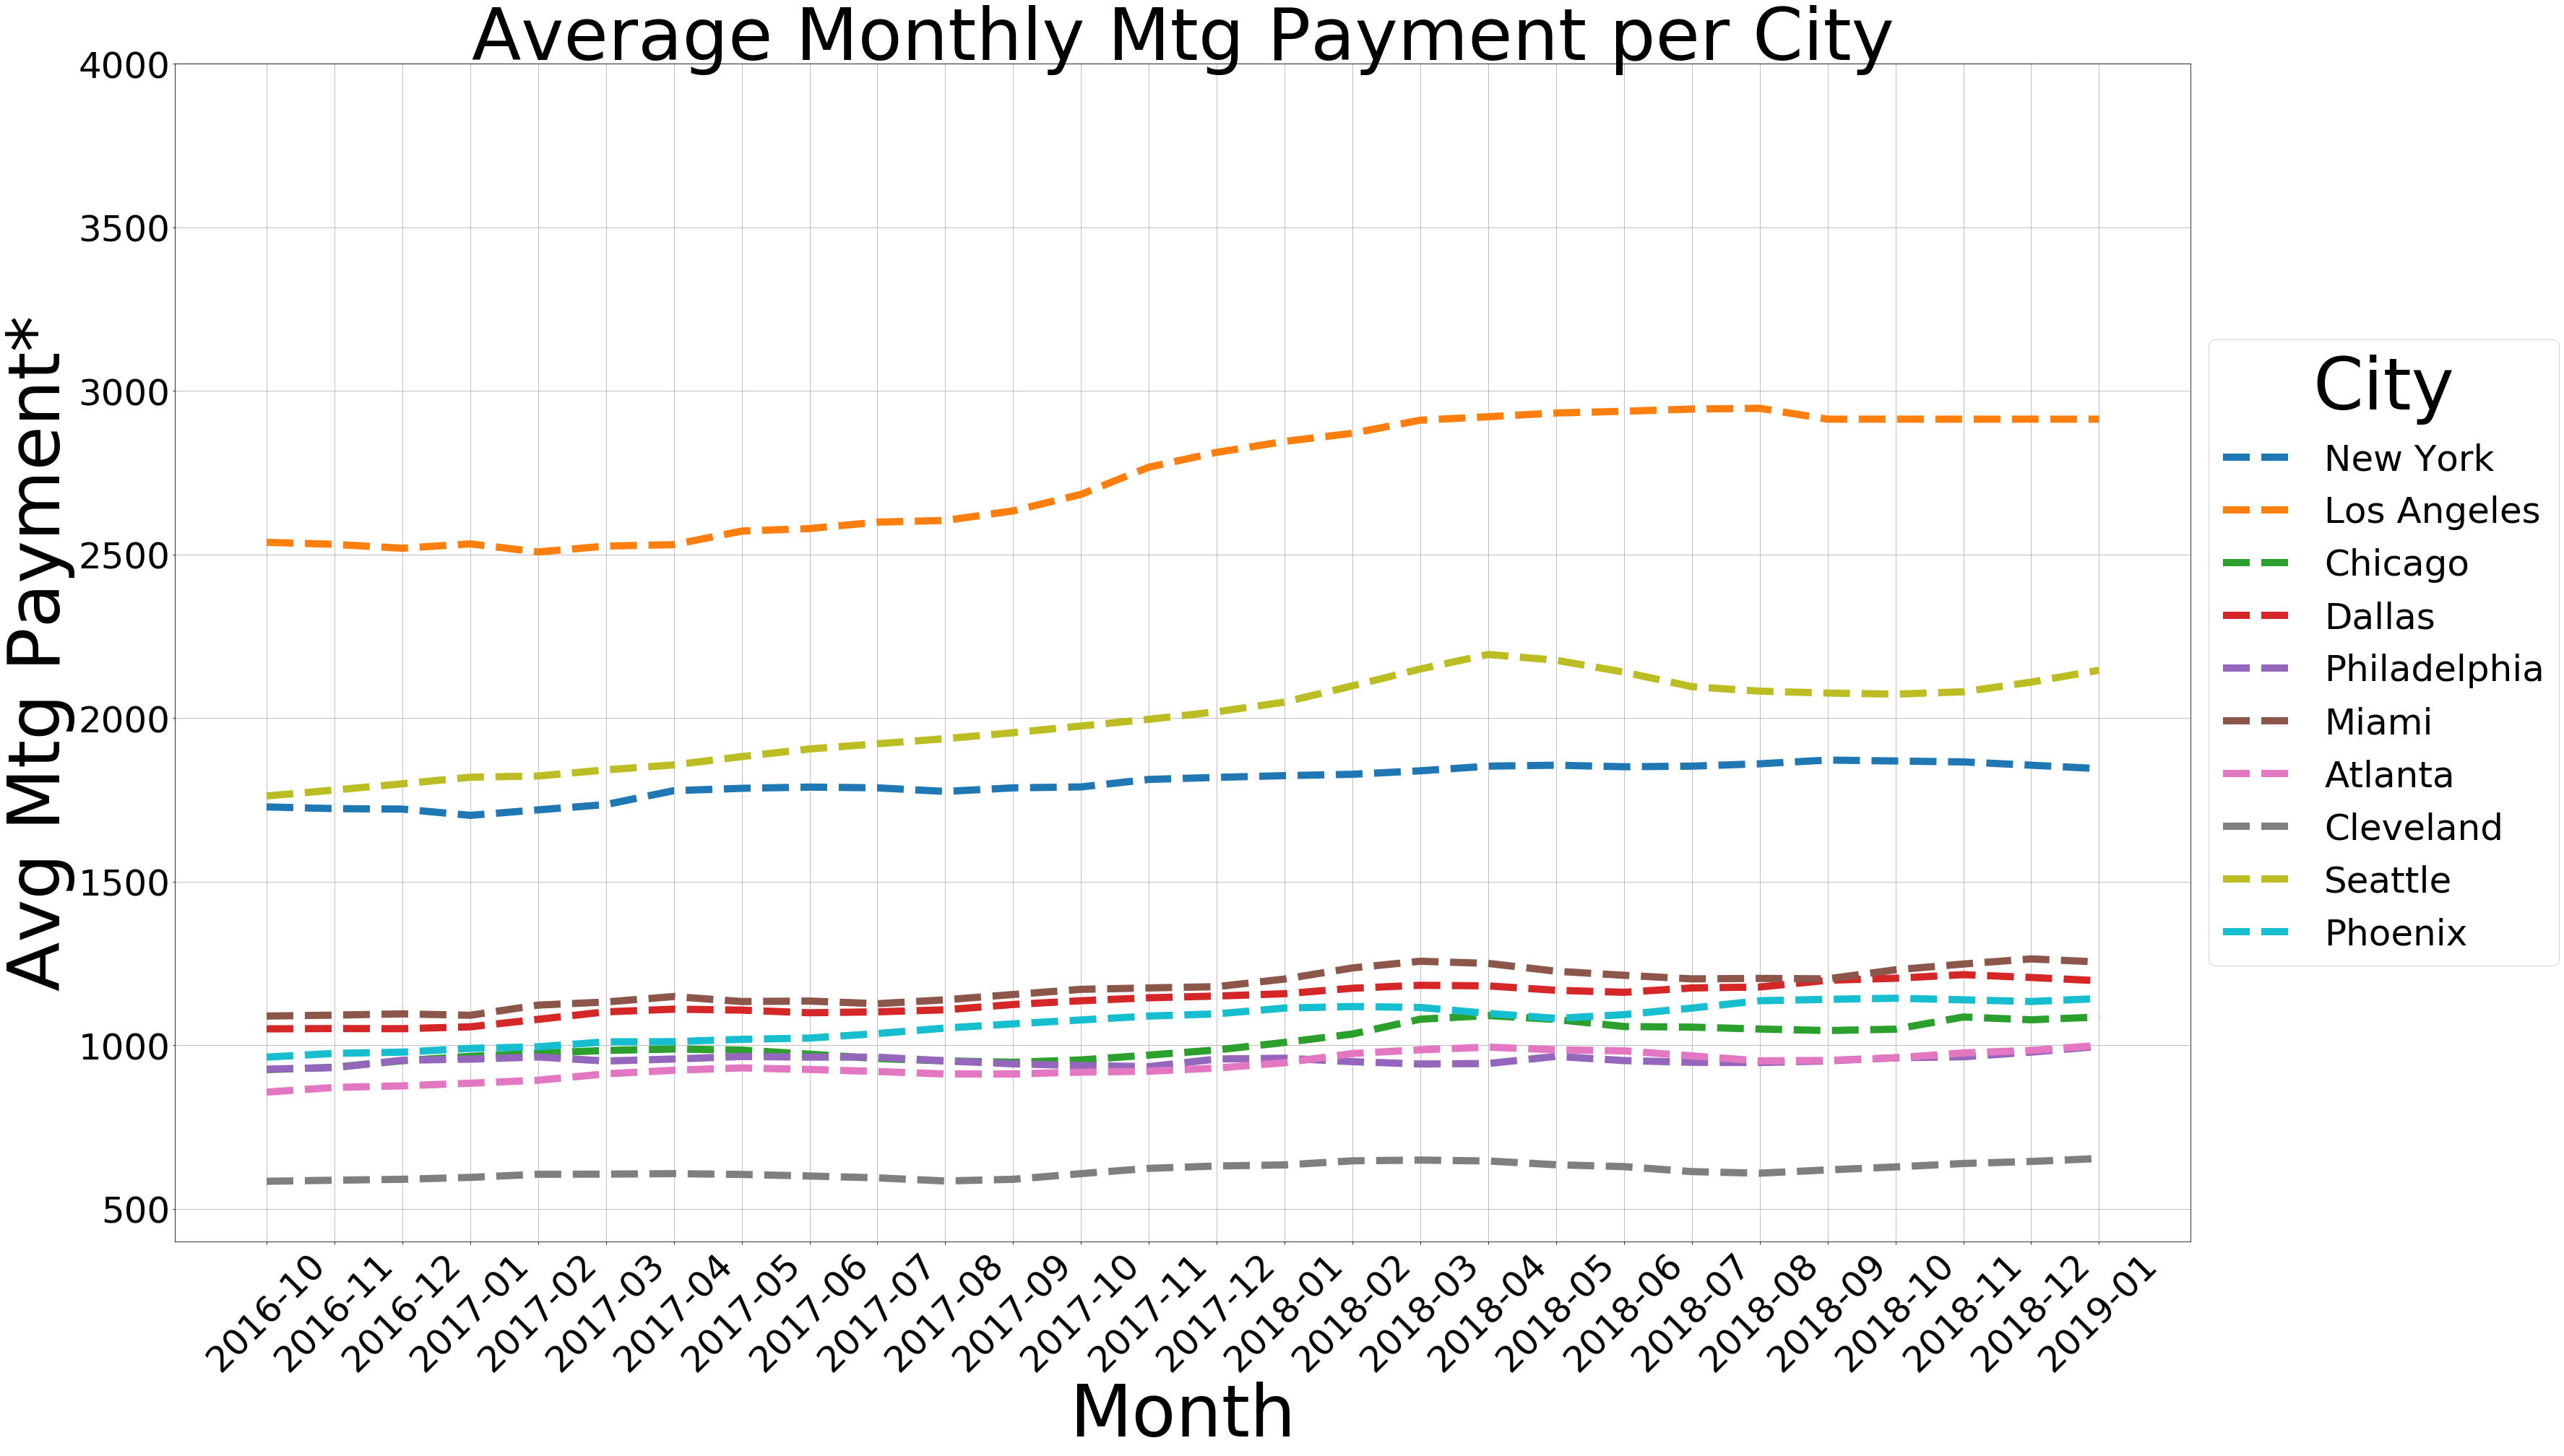

In [16]:
#define graph parameters
figsize=(50,30)
fontsize=100
linewidth=10

#initialize figure
fig, ax = plt.subplots(figsize=figsize)

#plot all cities on graph
for i in df_city:
    ax.plot(df_city[i], lw=linewidth, linestyle= "--")
#    ax.set_xticks(major_ticks, minor=False)
    
#graph formatting
plt.title('Average Monthly Mtg Payment per City', fontsize=fontsize)
plt.ylabel('Avg Mtg Payment*', fontsize=fontsize)
plt.xlabel('Month', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.xticks(rotation=45)
plt.grid(which='major')
plt.ylim(400,4000)
 #legend formatting
leg = plt.legend(loc='center left', bbox_to_anchor=(1, .5), title='Cities', ncol=1, fontsize=50)
leg.set_title('City',prop={'size':fontsize})

#save graph and show
plt.savefig(f'fig/AvgMtgPmtPerCity.png', bbox_inches='tight')
plt.show()